In [5]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [6]:
train=pd.read_csv("logistic.csv") 
test=pd.read_csv("logistic_test.csv")

In [7]:
train_original=train.copy() 
test_original=test.copy()

In [8]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [10]:
train.shape, test.shape

((614, 13), (367, 12))

In [11]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Univariate Analysis

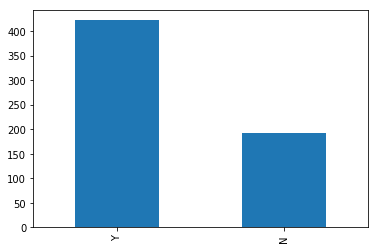

In [12]:
# Normalize can be set to True to print proportions instead of number
train['Loan_Status'].value_counts(normalize=True)    #Optional
train['Loan_Status'].value_counts().plot.bar()

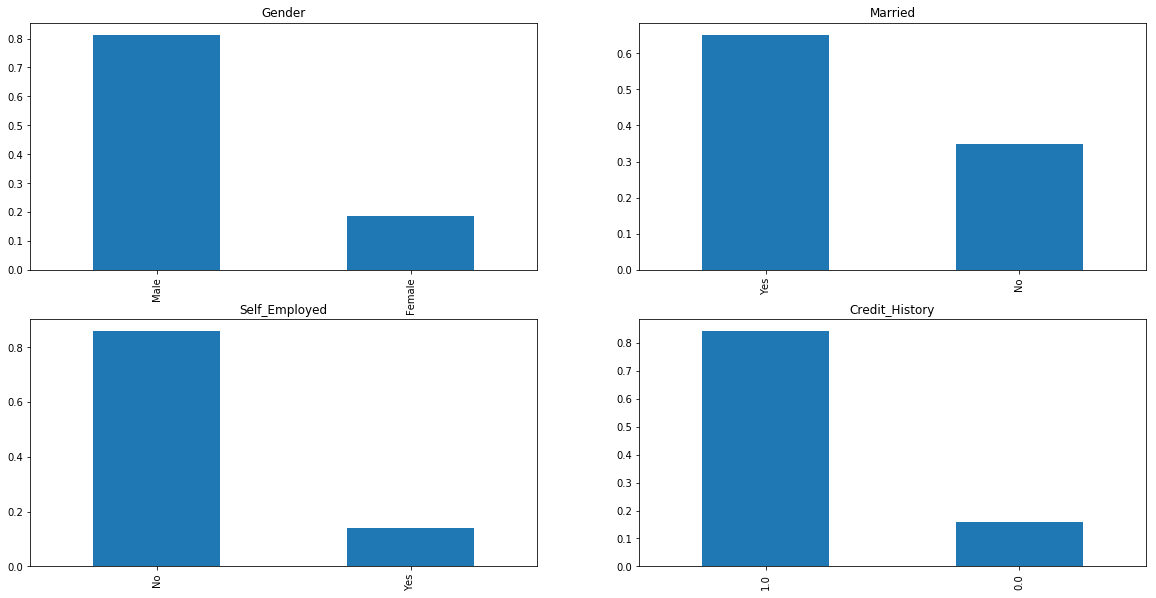

In [13]:
#To categorize between people whose loan is to be approved & whose is not on the basis of Gender,Married,Employment & credit_history 
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

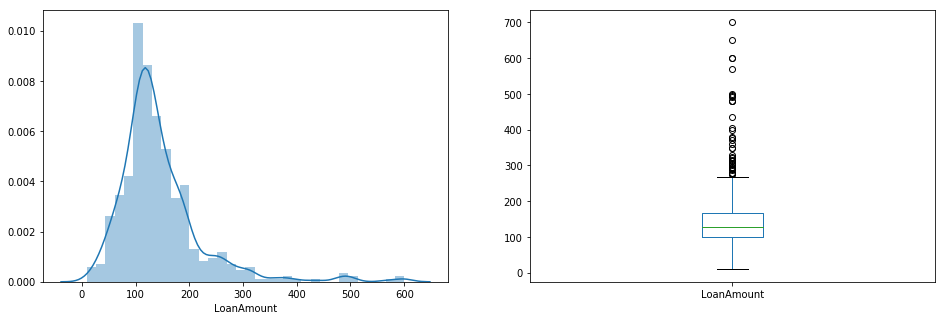

In [14]:
#On the basis of numerical data
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']); 
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

# Bivariate Analysis

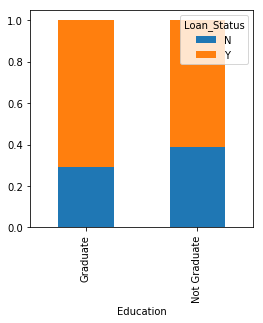

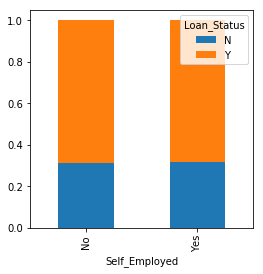

In [15]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) #String to float conversion 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

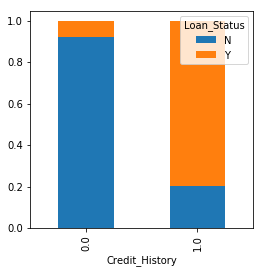

In [16]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 

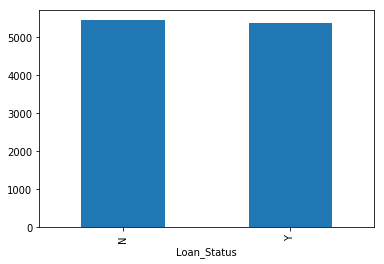

In [17]:
#Numerical Independent Variable vs Target Variable
#Find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

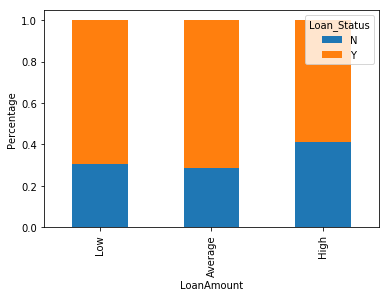

In [18]:
bins=[0,100,200,700] 
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

# Finding and removing missing values and outliers

In [19]:
train.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
LoanAmount_bin       134
dtype: int64

In [20]:
#For numerical variables: imputation using mean or median
#For categorical variables: imputation using mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [21]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [23]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [24]:
train.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
LoanAmount_bin       134
dtype: int64

In [25]:
train=train.drop(['LoanAmount_bin'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

In [26]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

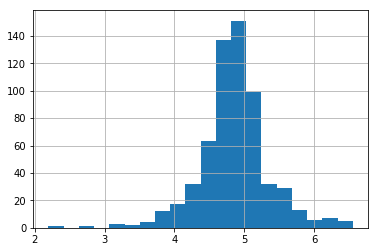

In [27]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [28]:
#drop the Loan_ID variable as it does not have any effect on the loan status.
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [29]:
#Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [30]:
#Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare.
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [32]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)
#Here the C parameter represents inverse of regularization strength.
#Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting.
#Smaller values of C specify stronger regularization.
#dual=false when n_samples>n_features

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7837837837837838

In [34]:
pred_test = model.predict(test)

In [35]:
submission=pd.read_csv("Sample.csv")

In [36]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [37]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [38]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Sample.csv')